In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## CNNs

In [2]:
def grab_width_and_logs(loc):
    with open(loc, 'r') as file:
        all_lines = file.readlines()
    
    split_all_lines = [a.split() for a in all_lines]
    logs = np.array([[float(e) for e in s[1:]] for s in split_all_lines])
    widths = [int(s[0].split('_')[-1].split('.')[0]) for s in split_all_lines]
    
    return widths, logs

In [3]:
cnn_widths, cnn_logs = grab_width_and_logs('width_files')

Text(0.5, 0, 'Width')

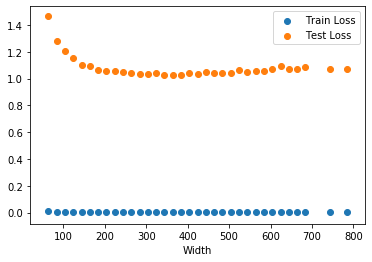

In [4]:
plt.scatter(cnn_widths, cnn_logs[:,2], label = 'Train Loss')
plt.scatter(cnn_widths, cnn_logs[:,4], label = 'Test Loss')
plt.legend()
plt.xlabel('Width')

Text(0.5, 0, 'Width')

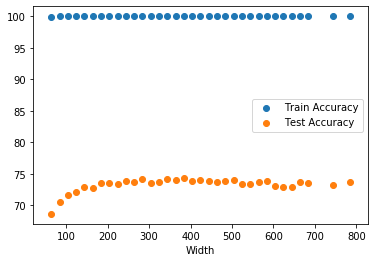

In [5]:
plt.scatter(cnn_widths, cnn_logs[:,3], label = 'Train Accuracy')
plt.scatter(cnn_widths, cnn_logs[:,5], label = 'Test Accuracy')
plt.legend()
plt.xlabel('Width')

Text(0.5, 1.0, 'ResNet18 - CIFAR100')

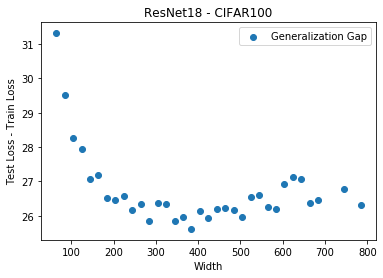

In [6]:
plt.scatter(cnn_widths, cnn_logs[:,3] - cnn_logs[:,5], label = 'Generalization Gap')
plt.legend()
plt.xlabel('Width')
plt.ylabel('Test Loss - Train Loss')
plt.title('ResNet18 - CIFAR100')

In [7]:
import pickle

with open("/Users/wesleymaddox/Documents/GitHub/hess_truck/saved-experiments/width_depth_experiment_logs.pkl", "rb") as handle:
    dump = pickle.load(handle)

In [8]:
eff_dim = dump['eff_dim']
losses = dump['losses']
pars = dump['parameters']

In [9]:
losses.shape

(4, 16, 9)

In [10]:
depth_three = losses[..., 3]

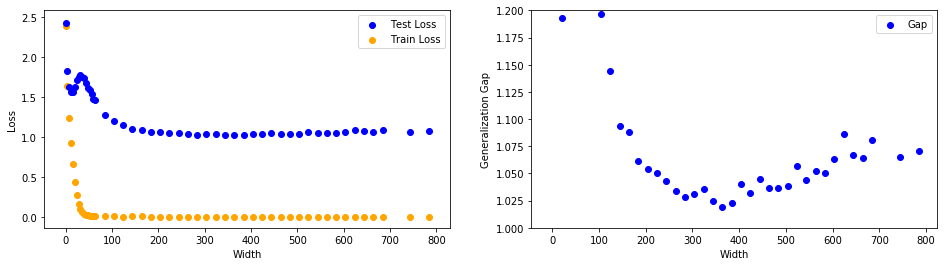

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].scatter(cnn_widths, cnn_logs[:, 4], color = 'blue', label = 'Test Loss')
ax[0].scatter(cnn_widths, cnn_logs[:, 2], color = 'orange', label = 'Train Loss')

ax[0].scatter(range(0, 64, 4), depth_three[0], color = 'orange')
ax[0].scatter(range(0, 64, 4), depth_three[2], color = 'blue')

ax[0].legend()
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Width')
#ax[0].set_ylim((0.004, 0.01))
ax[1].scatter(cnn_widths, cnn_logs[:, 4] - cnn_logs[:, 2], color='blue', label = 'Gap')
ax[1].scatter(range(0, 64, 4), depth_three[2] - depth_three[0], color = 'blue')
ax[1].set_ylim((1.0, 1.2))
ax[1].set_ylabel('Generalization Gap')
ax[1].set_xlabel('Width')
ax[1].legend()

#fig.suptitle('5 Layer CNN: CIFAR100', fontsize=18)

## ResNets

In [12]:
widths, logs = grab_width_and_logs('width_files2')

Text(0.5, 0, 'Width')

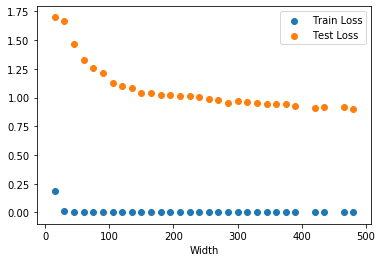

In [13]:
plt.scatter(widths, logs[:,2], label = 'Train Loss')
plt.scatter(widths, logs[:,4], label = 'Test Loss')
plt.legend()
plt.xlabel('Width')

In [14]:
new_widths = []
new_logs = np.zeros((0, 7))
for i in range(1, 5):
    loc = 'logs_v'+str(i)
    current_width, current_log = grab_width_and_logs(loc)
    [new_widths.append(j) for j in current_width]
    new_logs = np.concatenate((new_logs, current_log))

In [15]:
[widths.append(j) for j in new_widths]
logs = np.concatenate((logs, new_logs))

Text(0.5, 0.98, 'ResNet18, CIFAR100')

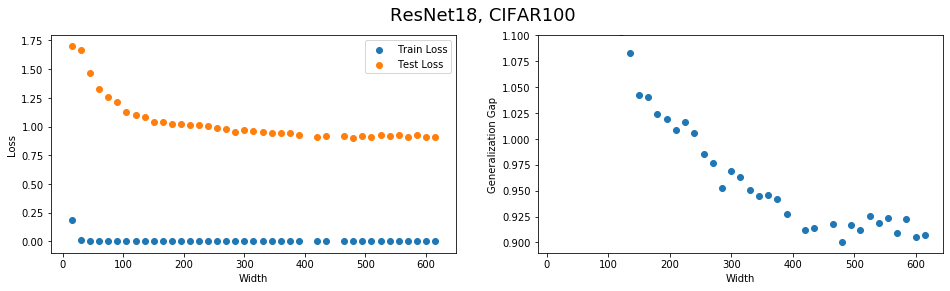

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].scatter(widths, logs[:,2], label = 'Train Loss')
ax[0].scatter(widths, logs[:,4], label = 'Test Loss')
ax[0].legend()
ax[0].set_xlabel('Width')
ax[0].set_ylabel('Loss')


ax[1].scatter(widths, logs[:,4] - logs[:,2])
ax[1].set_ylim((0.89, 1.1))
ax[1].set_xlabel('Width')
ax[1].set_ylabel('Generalization Gap')

fig.suptitle('ResNet18, CIFAR100', fontsize = 18)

Text(0.5, 0.98, 'ResNet18, CIFAR100')

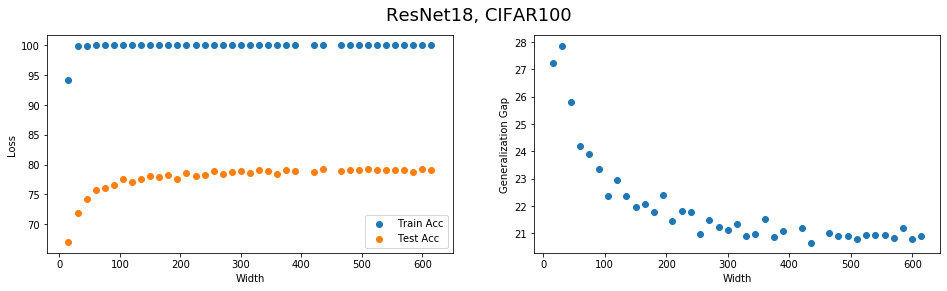

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].scatter(widths, logs[:,3], label = 'Train Acc')
ax[0].scatter(widths, logs[:,5], label = 'Test Acc')
ax[0].legend()
ax[0].set_xlabel('Width')
ax[0].set_ylabel('Loss')


ax[1].scatter(widths, logs[:,3] - logs[:,5])
#ax[1].set_ylim((0.89, 1.1))
ax[1].set_xlabel('Width')
ax[1].set_ylabel('Generalization Gap')

fig.suptitle('ResNet18, CIFAR100', fontsize = 18)

## Save Results

In [18]:
import pickle

In [19]:
with open('resnet_and_cnn_width_logs.pkl', 'wb') as handle:
    pickle.dump(file=handle,
               obj={'resnet': {'widths': widths, 'logs': logs},
               'cnn': {'widths': cnn_widths, 'logs': cnn_logs}})